In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
#Note(Please read):
#The notebook is created on Google colab and must be tested with the following datasets:
# 'train.csv', 'test.csv', 'flat_coord.csv', 'flat_mrt.csv', 'flat_hawker.csv', 'mrt_lrt.csv', 'list-of-government-markets-hawker-centres.csv',
#'harker_coordinates.csv', 'dist_cbd.csv', 'flat_final.csv'.
#Source code of extracting those datasets are provided with comments

In [3]:
data = pd.read_csv("/content/train.csv")
data=data.sort_values(['flat_type','flat_model','street_name'])
data.head()

,town,lat,lng,month,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
1109,BUKIT MERAH,NaN,NaN,2001-09-01,1 ROOM,33,TAMAN HO SWEE,10 TO 12,29.0,Improved,1969.0,36000.0,NaN
3127,BUKIT MERAH,NaN,NaN,2001-10-01,1 ROOM,33,TAMAN HO SWEE,01 TO 03,28.0,Improved,1969.0,37000.0,NaN
5149,BUKIT MERAH,NaN,NaN,2002-07-01,1 ROOM,33,TAMAN HO SWEE,07 TO 09,29.0,Improved,1969.0,41000.0,NaN
19572,BUKIT MERAH,NaN,NaN,2003-02-01,1 ROOM,33,TAMAN HO SWEE,01 TO 03,29.0,Improved,1969.0,55000.0,NaN
21995,BUKIT MERAH,NaN,NaN,2002-03-01,1 ROOM,33,TAMAN HO SWEE,07 TO 09,29.0,Improved,1969.0,44000.0,NaN


In [4]:
data['month'] = pd.to_datetime(data['month'])
data['flat_type'] = data['flat_type'].str.replace('MULTI-GENERATION', 'MULTI GENERATION')
replace_values = {'NEW GENERATION':'New Generation', 'SIMPLIFIED':'Simplified', 'STANDARD':'Standard', 'MODEL A-MAISONETTE':'Maisonette', 'MULTI GENERATION':'Multi Generation', 'IMPROVED-MAISONETTE':'Executive Maisonette', 'Improved-Maisonette':'Executive Maisonette', 'Premium Maisonette':'Executive Maisonette', '2-ROOM':'2-room', 'MODEL A':'Model A', 'MAISONETTE':'Maisonette', 'Model A-Maisonette':'Maisonette', 'IMPROVED':'Improved', 'TERRACE':'Terrace', 'PREMIUM APARTMENT':'Premium Apartment', 'Premium Apartment Loft':'Premium Apartment', 'APARTMENT':'Apartment', 'Type S1':'Type S1S2', 'Type S2':'Type S1S2'}
data = data.replace({'flat_model': replace_values})
data = data.reset_index(drop=True)

In [ ]:
#Types of Flat Models(from google):

#Standard: (1/2/3/4/5-room). 1960s HDB. Had WC and shower in same room. 5-room Standard were introduced in 1974.
#Improved: (1/2/3/4/5-room). Introduced in 1966, the 3/4-room having separate WC and shower, they also featured void decks. 5-room Improved were introduced in 1974.
#New Generation: Started first in 1975, New Generation flats can be 3-Room (67 / 82 sqm) or 4-Room (92 sqm), featuring en-suite toilet for master bedroom, with pedestal type Water Closet, plus store room.
#Model A: Introduced in 1981: 3-Room (75 sqm), 4-Room (105 sqm), 5-Room (135 sqm), 5-Room Maisonette (139 sqm)
#Model A2: Smaller units of Model A. e.g., 4-Room Model A2 (90 sqm)
#Simplified: Introduced in 1984: 3-Room (64 sqm), 4-Room (84 sqm)
#Multi Generation: 3Gen flats designed to meet the needs of multi-generation families.
#Maisonette: AKA Model A Maisonette — 2 storeys HDB flat
#Premium Apartment: Introduced somewhere during 1990s, featuring better quality finishes, you get them in ready-to-move condition, with flooring, kitchen cabinets, built-in wardrobes
#Executive Maisonette: More premium version of Model A Maisonettes. These units are no longer being built after being replaced by the Executive Condominium (EC) scheme in 1995
#Executive Apartment: Executive Apartment / Maisonette (146-150 sqm) were introduced in 1983 and replaced 5-Room Model A flats, in addition of the 3-bedroom and separate living/dining found in 5A flats, EA and EM feature an utility/maid room. 80% of Executive units were Maisonettes and 20% were Apartments.
#DBBS: public apartments built under the HDB's short-lived Design, Build and Sell Scheme (DBSS) from 2005 to 2012. They are a unique (and premium) breed of HDB flats in Singapore, which are built by private developers. High Prices. Quite similiar to Executive Condominium except DBBS is like a premium HDB without facilities of private condos
#Adjoined Flat: Large HDB flats which are combined from 2 HDB flats
#Terrace: HDB terrace flats built before HDB, without realizing Singapore's land constraint. Discontinued
#Type S1S2: apartments at The Pinnacle@Duxton are classified as "S" or Special apartments in view of its historical significance and award-winning design. For application of HDB policies, S1 and S2 apartments will be treated as 4-room and 5-room flats respectively
#2-room: Most likely refers to 2-room flexi where there is 1 bedroom and 1 common area

In [ ]:
#Next we focus on data visualization

/usr/local/lib/python3.7/dist-packages/matplotlib/patches.py:2902: RuntimeWarning: divide by zero encountered in double_scalars
  f1 = self.rad / d1
/usr/local/lib/python3.7/dist-packages/matplotlib/patches.py:2906: RuntimeWarning: invalid value encountered in double_scalars
  vertices.extend([(cx + dx1 * f1, cy + dy1 * f1),


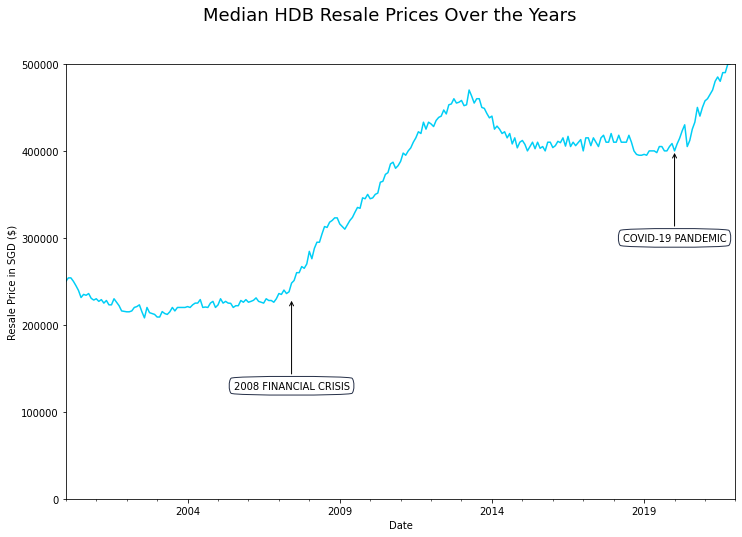

In [ ]:
# Plot Median Resale Prices Over the Years
fig = plt.figure(figsize=(12,8))
fig.suptitle('Median HDB Resale Prices Over the Years', fontsize=18)
ax1 = fig.add_subplot()
data.groupby('month')[['resale_price']].median().plot(ax=ax1, color='#00cef6', legend=None)
ax1.set_xlabel('Date'), ax1.set_ylabel('Resale Price in SGD ($)'), ax1.set_ylim(0, 500000)
ax1.annotate('2008 FINANCIAL CRISIS', xy=('2007-06-01',230000), xycoords='data', 
    bbox=dict(boxstyle="round4,pad=.5", fc="none", ec="#28324a"), xytext=(0,-90), textcoords='offset points', ha='center',
    arrowprops=dict(arrowstyle="->", connectionstyle="angle,angleA=0,angleB=90,rad=20"))  
ax1.annotate('COVID-19 PANDEMIC', xy=('2020-01-01',400000), xycoords='data', 
    bbox=dict(boxstyle="round4,pad=.5", fc="none", ec="#28324a"), xytext=(0,-90), textcoords='offset points', ha='center',
    arrowprops=dict(arrowstyle="->", connectionstyle="angle,angleA=0,angleB=90,rad=20"))  
plt.show()

In [5]:
#By each town
data['year'] = pd.DatetimeIndex(data['month']).year
data_town = data.groupby(['town'], as_index=False).agg({'resale_price': 'median'}).sort_values('resale_price', ascending=True).reset_index(drop=True)
data_town['resale_price'] = round(data_town['resale_price']/1000)
data_town['color'] = ['#f8766d'] + ['#3c78d8']*(len(data_town)-2) + ['#00ba38']

In [ ]:
def loll_plot(df, x, y,subtitle, xlabel, xlim):
    plt.rc('axes', axisbelow=True)
    plt.grid(linestyle='--', alpha=0.4)
    plt.hlines(y=df.index, xmin=0, xmax=df[x], color=df.color, linewidth=1)
    plt.scatter(df[x], df.index, color=df.color, s=300)
    for i, txt in enumerate(df[x]):
        plt.annotate(str(round(txt)), (txt, i), color='white', fontsize=9, ha='center', va='center')
    plt.annotate(subtitle,xy=(1, 0), xycoords='axes fraction', fontsize=20,
                    xytext=(-5, 5), textcoords='offset points',
                    ha='right', va='bottom')
    plt.yticks(df.index, df[y]); plt.xticks(fontsize=12); plt.xlim(xlim)
    plt.xlabel(xlabel, fontsize=14)

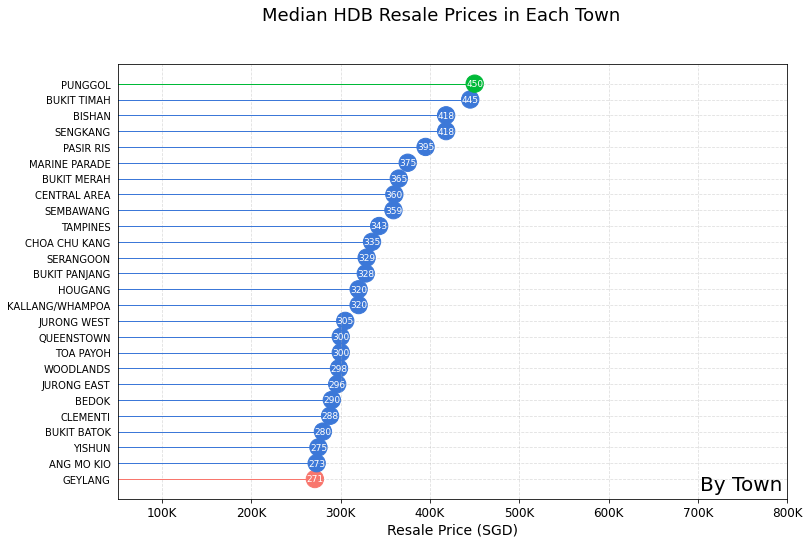

In [ ]:
fig = plt.figure(figsize=(12,8))
ax1 = plt.subplot()
loll_plot(data_town, 'resale_price', 'town', 'By Town','Resale Price (SGD)', [50,800])
ax1.set_xticklabels(['{:,.0f}'.format(x) + 'K' for x in ax1.get_xticks()])
ax1.yaxis.set_ticks_position('none') 
fig.suptitle('Median HDB Resale Prices in Each Town', fontsize=18)
plt.show()

Text(0.5, 1.0, 'HDB Resale Prices by Storey')

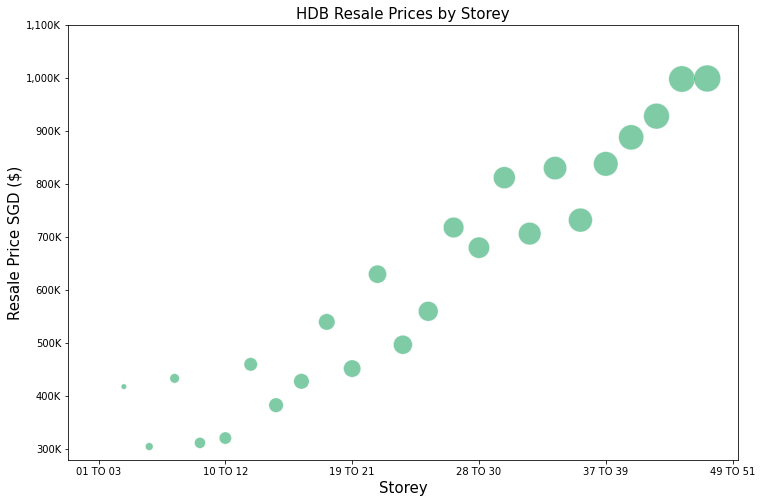

In [ ]:
#By storey
fig = plt.figure(figsize=(12,8))
ax1 = plt.subplot()
storey = data.groupby('storey_range')['resale_price'].median().reset_index().sort_values(by='storey_range')
storey['storey_rank'] = storey['storey_range'].astype('category').cat.codes # label encode
a=sns.scatterplot(x=storey['storey_rank'], y=storey['resale_price'], s=storey['storey_rank'].astype('int')*30, color='#00994d', edgecolors='w', alpha=0.5, ax=ax1)
ylabels = ['{:,.0f}'.format(x) + 'K' for x in a.get_yticks()/1000]
ax1.set_yticklabels(ylabels)
ax1.set_xticklabels(pd.Series(['']).append(storey.iloc[[0,5,10,15,20,24],0]))
ax1.set_ylim([280000,1100000]), ax1.set_ylabel('Resale Price SGD ($)', size=15), ax1.set_xlabel('Storey', size=15)
ax1.set_title('HDB Resale Prices by Storey', size=15)

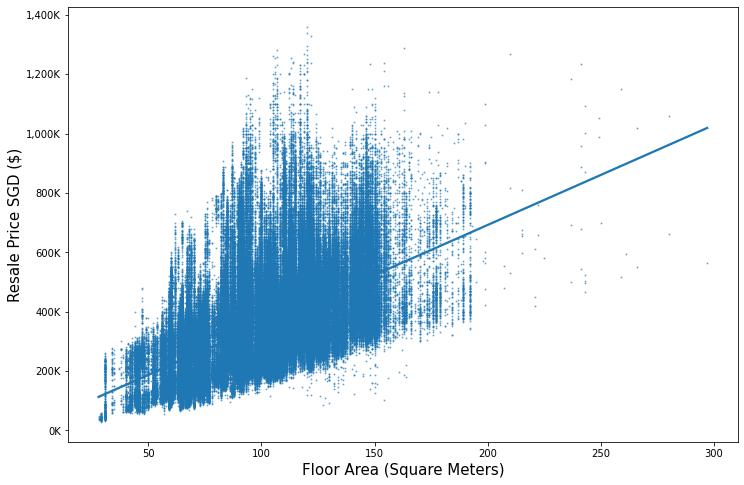

In [ ]:
# Floor Area Prices
fig = plt.figure(figsize=(12,8))
area = data[data['year'].isin([2015,2016,2017,2018])]
p1=sns.regplot(x=data['floor_area_sqm'], y=data['resale_price'], data=area, scatter_kws={"s": 1, 'alpha':0.5})
ylabels = ['{:,.0f}'.format(x) + 'K' for x in p1.get_yticks()/1000]
p1.set_yticklabels(ylabels)
p1.set_ylabel('Resale Price SGD ($)', size=15)
p1.set_xlabel('Floor Area (Square Meters)', size=15)
plt.show()

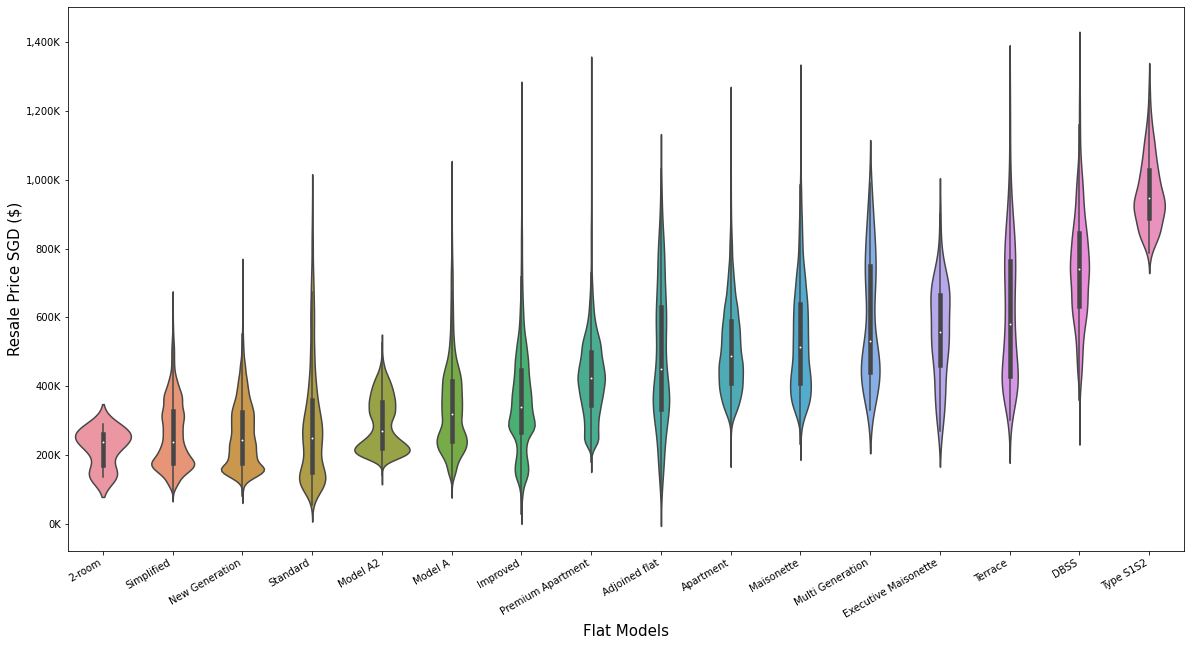

In [ ]:
#By Flat Model
fig = plt.figure(figsize=(20,10))
p2=sns.violinplot(x=data['flat_model'], y=data['resale_price'], data=data,
                order=data.groupby('flat_model')['resale_price'].median().sort_values().reset_index()['flat_model'].tolist())
p2.set_xlabel('Flat Models', size=15)
p2.set_xticklabels(p2.get_xticklabels(),rotation=30, ha='right')
ylabels = ['{:,.0f}'.format(x) + 'K' for x in p2.get_yticks()/1000]
p2.set_yticklabels(ylabels)
p2.set_ylabel('Resale Price SGD ($)', size=15)
plt.show()

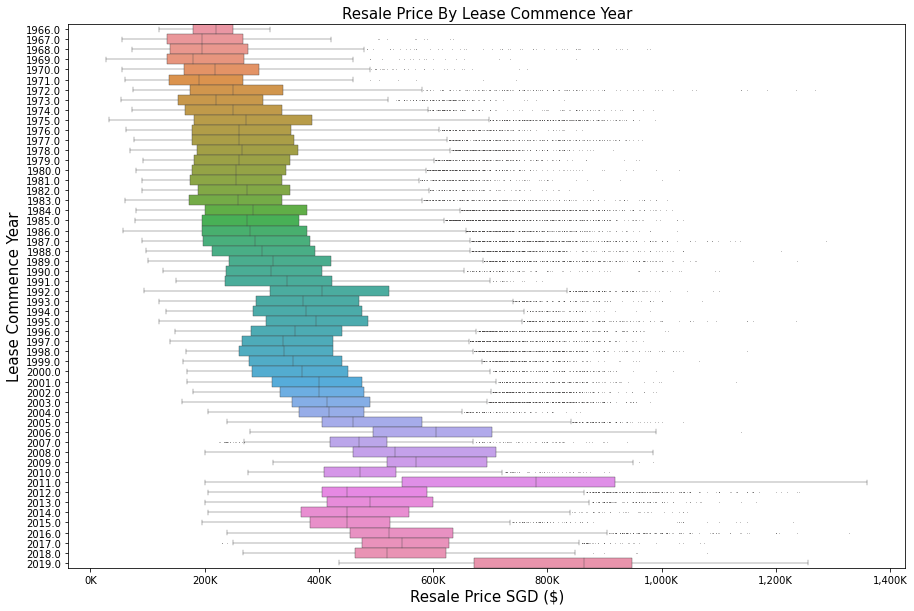

In [ ]:
#By lease commence
fig = plt.figure(figsize=(15,10))
p=sns.boxplot(y=data['lease_commence_date'], x=data['resale_price'], data=data, width=1, orient='h', flierprops = dict(markerfacecolor = 'red', markersize = 0.1, linestyle='none'), linewidth=0.4)
p.set_xlabel('Resale Price SGD ($)', size=15), p.set_ylabel('Lease Commence Year', size=15)
xlabels = ['{:,.0f}'.format(x) + 'K' for x in p.get_xticks()/1000]
p.set_xticklabels(xlabels)
p.set_title('Resale Price By Lease Commence Year', size=15)
plt.show()

In [6]:
data['storey_range']=data['storey_range'].str[:2].astype('int')
data["remaining_lease"] = 99 - (data['year'] - data["lease_commence_date"])
dict_flat_type = {v:k for k, v in enumerate(list(data['flat_type'].unique()))}
data.replace({'flat_type':dict_flat_type}, inplace=True)
data.head()

,town,lat,lng,month,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,year
0,BUKIT MERAH,NaN,NaN,2001-09-01,0,33,TAMAN HO SWEE,10,29.0,Improved,1969.0,36000.0,67.0,2001
1,BUKIT MERAH,NaN,NaN,2001-10-01,0,33,TAMAN HO SWEE,1,28.0,Improved,1969.0,37000.0,67.0,2001
2,BUKIT MERAH,NaN,NaN,2002-07-01,0,33,TAMAN HO SWEE,7,29.0,Improved,1969.0,41000.0,66.0,2002
3,BUKIT MERAH,NaN,NaN,2003-02-01,0,33,TAMAN HO SWEE,1,29.0,Improved,1969.0,55000.0,65.0,2003
4,BUKIT MERAH,NaN,NaN,2002-03-01,0,33,TAMAN HO SWEE,7,29.0,Improved,1969.0,44000.0,66.0,2002


In [7]:
#Clean the address column
data['address']= data['block']+' '+data['street_name']
text_replace_dict = {'GEORGES':'GEORGE’S', 'CWEALTH':'COMMONWEALTH','QUEENS':'QUEEN’S','MAMOR':'MA’MOR','ST':'STREET'}

In [8]:
def clean_address(string,dictionary):
  res = []
  for item in string.split():
    if item in dictionary:
      item = dictionary[item]
    res.append(item)
  return ' '.join(res)

In [ ]:
#The following three functions are used to obtain location data and calculate the distances.

In [9]:
import requests
import json
def find_postal(lst, filename):
    
    
    for index,ads in enumerate(lst):
        # Do not change the URL
        url= "https://developers.onemap.sg/commonapi/search?returnGeom=Y&getAddrDetails=Y&pageNum=1&searchVal="+ ads        
        print(index,url)
        
        
        response = requests.get(url)
        try:
            data = json.loads(response.text) 
        except ValueError:
            print('JSONDecodeError')
            pass
    
        temp_df = pd.DataFrame.from_dict(data["results"])
       
        temp_df["address"] = ads
        
        if index == 0:
            file = temp_df
        else:
            file = file.append(temp_df)
        file.to_csv(filename)

In [10]:
from geopy.distance import geodesic

def find_nearest(house, amenity, radius=2):
   
  
    results = {}
    
    for index,flat in enumerate(house.iloc[:,0]):
        
      
        flat_loc = (house.iloc[index,1],house.iloc[index,2])
        flat_amenity = ['','',100,0]
        for ind, eachloc in enumerate(amenity.iloc[:,0]):
            amenity_loc = (amenity.iloc[ind,1],amenity.iloc[ind,2])
            distance = geodesic(flat_loc,amenity_loc)
            distance = float(str(distance)[:-3]) 

            if distance <= radius:  
                flat_amenity[3] += 1

            if distance < flat_amenity[2]: 
                flat_amenity[0] = flat
                flat_amenity[1] = eachloc
                flat_amenity[2] = distance

        results[flat] = flat_amenity
    return results

In [11]:
def dist_from_location(house, location):
    
    results = {}
 
    for index,flat in enumerate(house.iloc[:,0]):
        
        
        flat_loc = (house.iloc[index,1],house.iloc[index,2])
        flat_amenity = ['',100]
        distance = geodesic(flat_loc,location)
        distance = float(str(distance)[:-3])
        flat_amenity[0] = flat
        flat_amenity[1] = distance
        results[flat] = flat_amenity
    return results

In [12]:
data['address_clean'] = [clean_address(x,text_replace_dict) for x in data['address']]
all_address = list(data['address_clean'])
unique_address = list(set(all_address))

In [ ]:
#This is to obtain geo data of flats and the data has been saved as a csv file names 'flat_coord.csv'
find_postal(unique_address, 'flat_coord.csv')

In [13]:
flat_coord =pd.read_csv('/content/flat_coord.csv') 
flat_coord.drop_duplicates(subset=['address'], inplace=True)
flat_coord = flat_coord[['address','LATITUDE','LONGITUDE']]
flat_coord

,address,LATITUDE,LONGITUDE
0,165 GANGSA RD,1.376851,103.765124
1,417 BEDOK NTH AVE 2,1.327576,103.930482
2,573 PASIR RIS STREET 53,1.373889,103.945876
3,549 BEDOK NTH AVE 1,1.331707,103.926780
5,261A SENGKANG EAST WAY,1.394097,103.894422
...,...,...,...
11604,240 TAMPINES STREET 21,1.355004,103.947121
11605,506 PASIR RIS STREET 52,1.376988,103.944846
11607,356A ADMIRALTY DR,1.449441,103.816852
11608,331A ANCHORVALE STREET,1.395950,103.890468


In [14]:
mrt_coord = pd.read_csv('/content/mrt_lrt_data.csv')
mrt_coord = mrt_coord[mrt_coord['type']=='MRT']
mrt_coord = mrt_coord[['station_name', 'lat', 'lng']]
mrt_coord

,station_name,lat,lng
0,Jurong East,1.333207,103.742308
1,Bukit Batok,1.349069,103.749596
2,Bukit Gombak,1.359043,103.751863
3,Choa Chu Kang,1.385417,103.744316
4,Yew Tee,1.397383,103.747523
...,...,...,...
114,Bedok North,1.335268,103.918054
115,Bedok Reservoir,1.336595,103.933070
116,Tampines West,1.345583,103.938244
117,Tampines East,1.356310,103.955471


In [16]:
#This is to calculate the shortest distance
nearest_mrt = find_nearest(flat_coord, mrt_coord)
flat_mrt = pd.DataFrame.from_dict(nearest_mrt).T
flat_mrt = flat_mrt.rename(columns={0: 'flat', 1: 'mrt', 2: 'mrt_dist', 3: 'num_mrt_2km'}).reset_index().drop('index', axis=1)

In [17]:
flat_mrt.head()

,flat,mrt,mrt_dist,num_mrt_2km
0,165 GANGSA RD,Bukit Panjang,0.339871,3
1,417 BEDOK NTH AVE 2,Bedok,0.391825,4
2,573 PASIR RIS STREET 53,Pasir Ris,0.39254,1
3,549 BEDOK NTH AVE 1,Bedok Reservoir,0.884379,5
4,261A SENGKANG EAST WAY,Sengkang,0.291674,3


In [18]:
hawker = pd.read_csv('/content/list-of-government-markets-hawker-centres.csv')
hawker_name = list(hawker['name_of_centre'])
unique_hawker_name = list(set(hawker_name))

In [19]:
def clean_hawker_address(string):
  res = []
  for item in string.split():
    if item != 'Blk':
      res.append(item)
  return ' '.join(res)

In [20]:
unique_hawker_name = [clean_hawker_address(x) for x in unique_hawker_name]

In [ ]:
#This is to obtain geo data for hawkers
find_postal(unique_hawker_name, 'hawker_coordinates.csv')

In [21]:
hawker_coord = pd.read_csv('/content/hawker_coordinates.csv')
hawker_coord = hawker_coord[['address','LATITUDE','LONGITUDE']]
hawker_coord

,address,LATITUDE,LONGITUDE
0,84 Marine Parade Central,1.302285,103.906289
1,84 Marine Parade Central,1.302297,103.906344
2,163 Bukit Merah Central,1.283881,103.816940
3,163 Bukit Merah Central,1.283702,103.816950
4,163 Bukit Merah Central,1.283703,103.817052
...,...,...,...
128,1 Jalan Kukoh,1.288252,103.839940
129,4A Jalan Batu,1.302354,103.883980
130,505 Jurong West Street 52,1.349642,103.718448
131,85 Bedok North Street 4,1.332058,103.938715


In [22]:
#Same as above
nearest_hawker = find_nearest(flat_coord, hawker_coord)
flat_hawker = pd.DataFrame.from_dict(nearest_hawker).T
flat_hawker = flat_hawker.rename(columns={0: 'flat', 1: 'hawker', 2: 'hawker_dist', 3: 'num_hawker_2km'}).reset_index().drop('index', axis=1)

In [23]:
flat_hawker.head()

,flat,hawker,hawker_dist,num_hawker_2km
0,165 GANGSA RD,Market Street Food Centre,3.949678,0
1,417 BEDOK NTH AVE 2,208B New Upper Changi Road,0.309006,11
2,573 PASIR RIS STREET 53,Market Street Food Centre,2.660152,0
3,549 BEDOK NTH AVE 1,538 Bedok North Street 3,0.189197,11
4,261A SENGKANG EAST WAY,Kovan Market & Food Centre,3.980391,0


In [24]:
#distance to central area
dist_cbd = dist_from_location(flat_coord, (1.300556, 103.821667))
dist_cbd = pd.DataFrame.from_dict(dist_cbd).T
dist_cbd = dist_cbd.rename(columns={0: 'flat', 1: 'dist_cbd'}).reset_index().drop(['index'], axis=1)
dist_cbd

,flat,dist_cbd
0,165 GANGSA RD,10.524681
1,417 BEDOK NTH AVE 2,12.473206
2,573 PASIR RIS STREET 53,16.025967
3,549 BEDOK NTH AVE 1,12.194644
4,261A SENGKANG EAST WAY,13.13556
...,...,...
9354,240 TAMPINES STREET 21,15.20458
9355,506 PASIR RIS STREET 52,16.104373
9356,356A ADMIRALTY DR,16.471701
9357,331A ANCHORVALE STREET,13.034178


In [25]:
#Final dataframe
flat_final = flat_mrt.merge(flat_hawker, on='flat', how='outer')
flat_final = flat_final.merge(dist_cbd, on='flat', how='outer')
flat_final

,flat,mrt,mrt_dist,num_mrt_2km,hawker,hawker_dist,num_hawker_2km,dist_cbd
0,165 GANGSA RD,Bukit Panjang,0.339871,3,Market Street Food Centre,3.949678,0,10.524681
1,417 BEDOK NTH AVE 2,Bedok,0.391825,4,208B New Upper Changi Road,0.309006,11,12.473206
2,573 PASIR RIS STREET 53,Pasir Ris,0.39254,1,Market Street Food Centre,2.660152,0,16.025967
3,549 BEDOK NTH AVE 1,Bedok Reservoir,0.884379,5,538 Bedok North Street 3,0.189197,11,12.194644
4,261A SENGKANG EAST WAY,Sengkang,0.291674,3,Kovan Market & Food Centre,3.980391,0,13.13556
...,...,...,...,...,...,...,...,...
9354,240 TAMPINES STREET 21,Tampines,0.426652,4,137 Tampines Street 11,1.057524,3,15.20458
9355,506 PASIR RIS STREET 52,Pasir Ris,0.650182,1,Market Street Food Centre,3.005597,0,16.104373
9356,356A ADMIRALTY DR,Sembawang,0.358581,1,Chong Pang Market & Food Centre,2.318486,0,16.471701
9357,331A ANCHORVALE STREET,Sengkang,0.7302,3,Kovan Market & Food Centre,4.104351,0,13.034178


In [26]:
#Drop duplicated features
data = data.drop(['address','block', 'year', 'lat', 'lng'], axis = 1)

In [27]:
cols = list(data.columns)
data = data[[cols[0]] + [cols[-1]] + cols[1:-1]]

In [28]:
data = data.rename(columns = {'address_clean': 'flat', 'storey_range': 'storey'})
data[['flat_type','flat_model']] = data[['flat_type','flat_model']].astype('category')

In [29]:
data = data.merge(flat_final, on='flat', how='left')
data = data.drop(['hawker','mrt'], axis = 1)

In [30]:
#Use KNNimputer to impute missing value
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3)
data[['mrt_dist','num_mrt_2km', 'hawker_dist', 'num_hawker_2km', 'dist_cbd']] = imputer.fit_transform(data[['mrt_dist','num_mrt_2km', 'hawker_dist', 'num_hawker_2km', 'dist_cbd']].values)

In [31]:
data[['num_mrt_2km', 'num_hawker_2km']] = data[['num_mrt_2km', 'num_hawker_2km']].astype('int')#we want them to be integer

In [32]:
tmp = data.groupby('town')[['num_mrt_2km', 'num_hawker_2km', 'mrt_dist', 'hawker_dist', 'dist_cbd', 'resale_price']].median().reset_index()

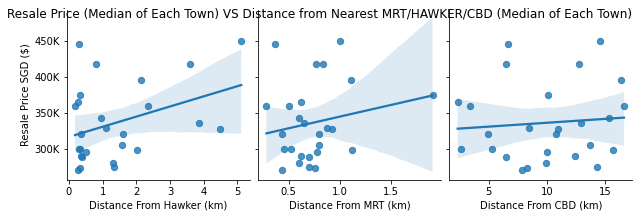

In [ ]:
#Visualize the relation between the distances and resale price
p=sns.pairplot(tmp, x_vars=["hawker_dist", "mrt_dist", 'dist_cbd'], y_vars=["resale_price"], height=3, aspect=1, kind="reg", plot_kws=dict(scatter_kws=dict(s=40)))
axes=p.axes
ylabels = ['{:,.0f}'.format(x) + 'K' for x in axes[0,0].get_yticks()/1000]
axes[0,0].set_yticklabels(ylabels), axes[0,0].set_ylabel('Resale Price SGD ($)', size=10)
axes[0,0].set_xlabel('Distance From Hawker (km)', size=10)
axes[0,1].set_xlabel('Distance From MRT (km)', size=10)
axes[0,2].set_xlabel('Distance From CBD (km)', size=10)
plt.suptitle('Resale Price (Median of Each Town) VS Distance from Nearest MRT/HAWKER/CBD (Median of Each Town)')
plt.show()

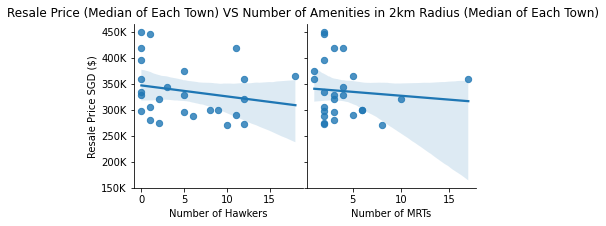

In [ ]:
#Visualize the relationship between the number of amenities
p=sns.pairplot(tmp, x_vars=["num_hawker_2km", "num_mrt_2km"], y_vars=["resale_price"], height=3, aspect=1, kind="reg", plot_kws=dict(scatter_kws=dict(s=40)))
axes=p.axes
ylabels = ['{:,.0f}'.format(x) + 'K' for x in axes[0,0].get_yticks()/1000]
axes[0,0].set_yticklabels(ylabels), axes[0,0].set_ylabel('Resale Price SGD ($)', size=10)
axes[0,0].set_xlabel('Number of Hawkers', size=10)
axes[0,1].set_xlabel('Number of MRTs', size=10)
plt.suptitle('Resale Price (Median of Each Town) VS Number of Amenities in 2km Radius (Median of Each Town)')
plt.tight_layout(pad=0, rect=[0, 0, 0.9, 0.9])
plt.show()

In [33]:
data['month'] = pd.DatetimeIndex(data['month']).year
data['flat_type'] = data['flat_type'].astype('int')

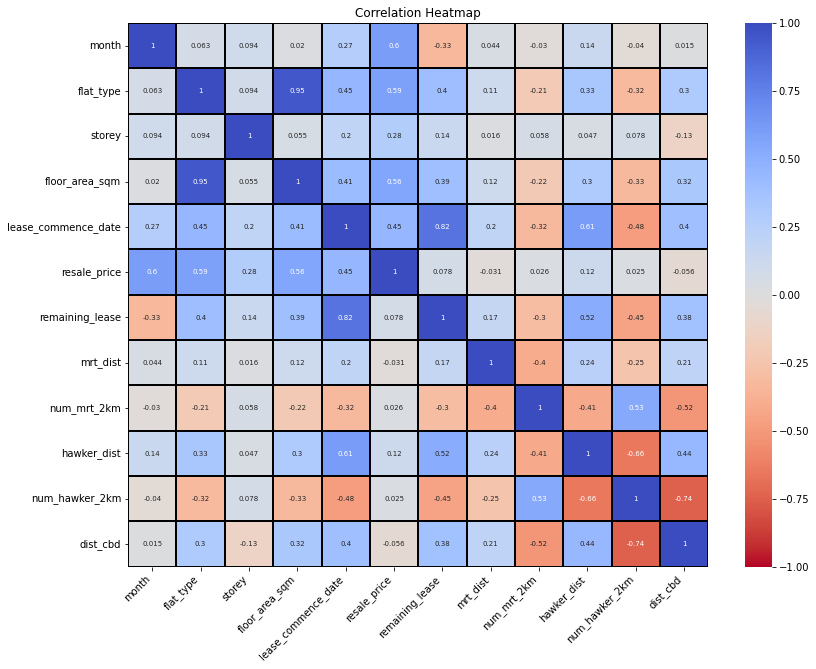

In [ ]:
#Heatmap helps us identify redundant or insignificant features
fig = plt.figure(figsize=(13,10))
ax = sns.heatmap(data.corr(), annot = True, fmt='.2g', 
    vmin=-1, vmax=1, center= 0, cmap= 'coolwarm_r', linecolor='black', linewidth=1, annot_kws={"size": 7})

plt.xticks(rotation=45, ha='right')
plt.title('Correlation Heatmap')
fig.show()

In [34]:
data = data.drop(['remaining_lease', 'flat_type', 'num_mrt_2km', 'num_hawker_2km', 'dist_cbd'], axis = 1)

In [35]:
#Standardize numerical data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [36]:
num_columns = ['floor_area_sqm','lease_commence_date', 'storey', 'month', 'mrt_dist','hawker_dist']

num_feature = pd.DataFrame(scaler.fit_transform(data[num_columns]), columns = num_columns)
cat_feature = data[['town', 'flat_model']]
data_train = pd.concat([num_feature,cat_feature], axis=1)
data_train.head()

,floor_area_sqm,lease_commence_date,storey,month,mrt_dist,hawker_dist,town,flat_model
0,-2.695938,-1.933914,0.647730,-1.294531,-2.583874e-16,3.051576e-16,BUKIT MERAH,Improved
1,-2.735683,-1.933914,-1.171445,-1.294531,-2.583874e-16,3.051576e-16,BUKIT MERAH,Improved
2,-2.695938,-1.933914,0.041339,-1.141936,-2.583874e-16,3.051576e-16,BUKIT MERAH,Improved
3,-2.695938,-1.933914,-1.171445,-0.989342,-2.583874e-16,3.051576e-16,BUKIT MERAH,Improved
4,-2.695938,-1.933914,0.041339,-1.141936,-2.583874e-16,3.051576e-16,BUKIT MERAH,Improved


In [37]:
#Encode categorical data
data_train = pd.get_dummies(data_train, columns=['town'], prefix=['town']) 
data_train = pd.get_dummies(data_train, columns=['flat_model'], prefix=['model'])

In [50]:
x1 = data_train.drop(['mrt_dist','hawker_dist'], axis=1).values
y = data["resale_price"].values.reshape(-1, 1)
x1.shape

(462515, 46)

In [44]:
#exclude mrt etc.
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x1, y)

print(f'Coefficients: {lin_reg.coef_}')
print(f'Intercept: {lin_reg.intercept_}')
print(f'R^2 score: {lin_reg.score(x1, y)}')

Coefficients: [[ 8.23632663e+04  3.78313628e+04  1.74284242e+04  7.93349919e+04
   1.81081748e+04  5.78170385e+03  6.26319910e+04 -3.21709482e+04
   9.08879476e+04 -8.03871043e+04  1.18233213e+05  8.13803303e+04
  -8.90658802e+04  3.84130855e+04  3.70661167e+04 -3.48747688e+04
  -3.12933162e+04 -6.55362236e+04  4.94025439e+04  1.24524342e+05
  -4.66840970e+04 -6.66259667e+04  9.45753835e+04 -1.01604483e+05
  -7.29990256e+04  4.03726348e+01 -1.13843599e+04  5.49036050e+04
  -9.06055298e+04 -5.27171067e+04 -5.21128162e+04 -5.64985981e+04
  -3.16113559e+04  9.90877389e+04  2.11443061e+04 -5.19070248e+04
  -1.63690099e+04 -5.96683865e+04 -5.41385278e+04  1.19774619e+03
  -4.53512801e+04 -4.42373956e+04 -4.57350833e+04 -4.70809280e+04
   1.63870106e+05  2.19410509e+05]]
Intercept: [415008.65113592]
R^2 score: 0.8211811340672217


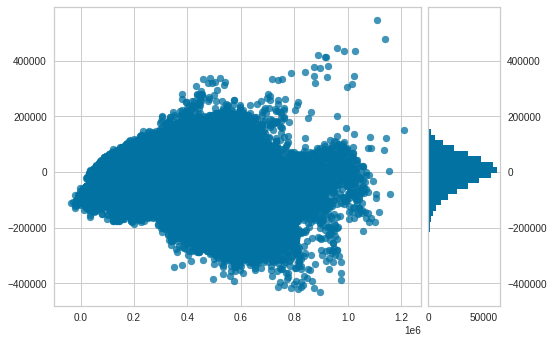

In [ ]:
#Residual plots
from yellowbrick.regressor import ResidualsPlot
visualizer_residuals = ResidualsPlot(lin_reg)
visualizer_residuals.fit(x1, y)
plt.show()

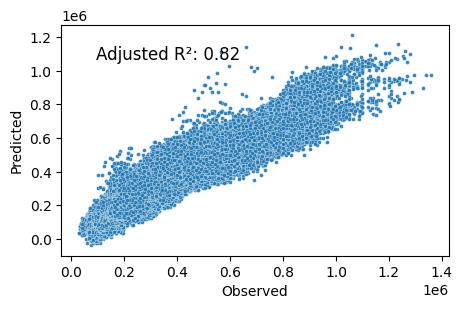

In [ ]:
plt.style.use('default')
fig = plt.figure(figsize=(5,3))
ax = sns.scatterplot(x= data['resale_price'], y=lin_reg.predict(x1).reshape(1,-1)[0], edgecolors='w', alpha=0.9, s=8)
ax.set_xlabel('Observed')
ax.set_ylabel('Predicted')
ax.annotate('Adjusted R\u00b2: ' + str(format(lin_reg.score(x1, y), '.2f')), xy=(0, 1), xytext=(25, -25),
    xycoords='axes fraction', textcoords='offset points', fontsize=12)
plt.show()

In [ ]:
#More detailed regression report
import statsmodels.api as sm
x1_constant = sm.add_constant(x1)
lin_reg = sm.OLS(y,x1_constant).fit()
lin_reg.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                 4.827e+04
Date:                Thu, 14 Apr 2022   Prob (F-statistic):               0.00
Time:                        14:03:16   Log-Likelihood:            -5.7753e+06
No. Observations:              462515   AIC:                         1.155e+07
Df Residuals:                  462470   BIC:                         1.155e+07
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        3.77e+05    918.761    410.282      0.000    3.75e+05    3.79e+05
x1          8.236e+04    146.652    561.623      0.000    8.21e+04    8.27e+04
x2          3.783e+04    161.566    234.154      0.000    3.75e+04    3.81e+04
x3          1.743e+04    100.914    172.705      0.000    1.72e+04    1.76e+04
x4          7.933e+04    100.405    790.153      0.000    7.91e+04    7.95e+04
x5          3.261e+04    469.126     69.504      0.000    3.17e+04    3.35e+04
x6          2.028e+04    400.309     50.660      0.000    1.95e+04    2.11e+04
x7          7.713e+04    654.580    117.831      0.000    7.58e+04    7.84e+04
x8         -1.767e+04    462.726    -38.193      0.000   -1.86e+04   -1.68e+04
x9          1.054e+05    501.002    210.351      0.000    1.04e+05    1.06e+05
x10        -6.589e+04    514.677   -128.020      0.000   -6.69e+04   -6.49e+04
x11         1.327e+05   1804.090     73.572      0.000    1.29e+05    1.36e+05
x12         9.588e+04   1164.384     82.343      0.000    9.36e+04    9.82e+04
x13        -7.457e+04    457.029   -163.157      0.000   -7.55e+04   -7.37e+04
x14         5.291e+04    603.698     87.645      0.000    5.17e+04    5.41e+04
x15         5.156e+04    578.938     89.067      0.000    5.04e+04    5.27e+04
x16        -2.038e+04    416.447    -48.930      0.000   -2.12e+04   -1.96e+04
x17         -1.68e+04    592.041    -28.368      0.000    -1.8e+04   -1.56e+04
x18        -5.104e+04    361.876   -141.037      0.000   -5.17e+04   -5.03e+04
x19          6.39e+04    565.224    113.054      0.000    6.28e+04     6.5e+04
x20          1.39e+05   1074.388    129.397      0.000    1.37e+05    1.41e+05
x21        -3.219e+04    519.005    -62.015      0.000   -3.32e+04   -3.12e+04
x22        -5.213e+04    631.441    -82.554      0.000   -5.34e+04   -5.09e+04
x23         1.091e+05    575.358    189.575      0.000    1.08e+05     1.1e+05
x24        -8.711e+04    675.224   -129.004      0.000   -8.84e+04   -8.58e+04
x25         -5.85e+04    482.242   -121.310      0.000   -5.94e+04   -5.76e+04
x26         1.454e+04    618.647     23.500      0.000    1.33e+04    1.58e+04
x27         3113.7589    363.135      8.575      0.000    2402.025    3825.492
x28          6.94e+04    537.872    129.030      0.000    6.83e+04    7.05e+04
x29        -7.611e+04    350.212   -217.318      0.000   -7.68e+04   -7.54e+04
x30        -3.822e+04    394.247    -96.942      0.000    -3.9e+04   -3.74e+04
x31        -2.855e+04   1.26e+04     -2.267      0.023   -5.32e+04   -3866.544
x32        -3.294e+04   2217.593    -14.854      0.000   -3.73e+04   -2.86e+04
x33        -8051.9128   1066.003     -7.553      0.000   -1.01e+04   -5962.581
x34         1.226e+05   1677.188     73.127      0.000    1.19e+05    1.26e+05
x35          4.47e+04   5255.656      8.506      0.000    3.44e+04     5.5e+04
x3

In [45]:
#include mrt
x2 = data_train.values
lin_reg.fit(x2, y)

print(f'Coefficients: {lin_reg.coef_}')
print(f'Intercept: {lin_reg.intercept_}')
print(f'R^2 score: {lin_reg.score(x2, y)}')

Coefficients: [[  81756.26694035   41568.44363779   17267.08185352   79322.9258112
   -16557.96527179  -14735.41697289   13915.48158991   -7072.27141752
    57270.62351602  -38392.66191737   76025.08412696  -46668.40376171
    90880.14578549   52499.64349501  -65949.10436692   33278.85380901
    15388.19039669  -30550.98967791  -34951.01848898  -65231.00374767
    29531.40483019  158808.48905757  -24835.39574244  -27311.29348319
    72949.47803083 -108176.46047058  -49736.2597368    10749.72057561
   -22744.64815208   40834.92440487  -76549.83260858  -53962.69604643
   -69267.22173967  -54997.5168988   -31841.18252502   87721.37823343
    15199.99413318  -49889.89537837  -14738.30977637  -58865.23089234
   -44562.5340973      649.78534017  -49720.0445465   -40987.71115105
   -47492.35615015  -43414.66081258  185631.31811727  216574.18814412]]
Intercept: [413193.0360439]
R^2 score: 0.8319831507606371


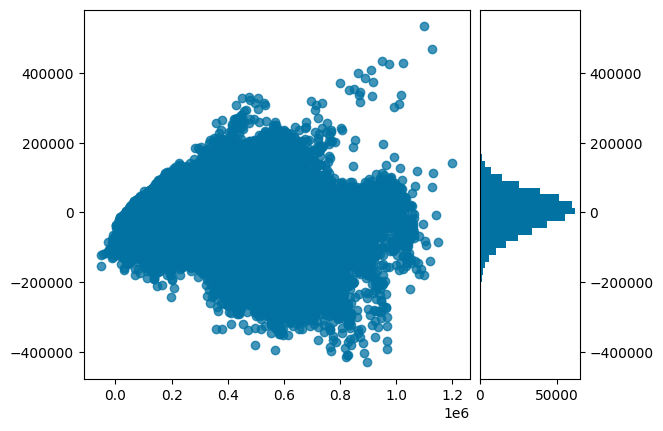

In [ ]:
visualizer_residuals = ResidualsPlot(lin_reg)
visualizer_residuals.fit(x2, y)
plt.show()

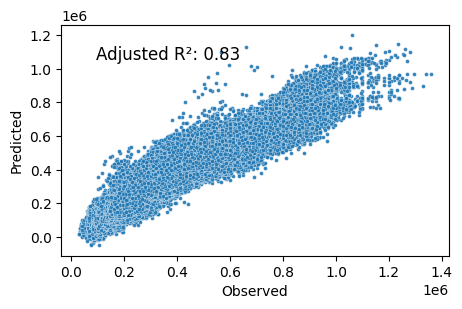

In [ ]:
plt.style.use('default')
fig = plt.figure(figsize=(5,3))
ax = sns.scatterplot(x= data['resale_price'], y=lin_reg.predict(x2).reshape(1,-1)[0], edgecolors='w', alpha=0.9, s=8)
ax.set_xlabel('Observed')
ax.set_ylabel('Predicted')
ax.annotate('Adjusted R\u00b2: ' + str(format(lin_reg.score(x2, y), '.2f')), xy=(0, 1), xytext=(25, -25),
    xycoords='axes fraction', textcoords='offset points', fontsize=12)
plt.show()

In [ ]:
x2_constant = sm.add_constant(x2)
lin_reg = sm.OLS(y,x2_constant).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                 4.978e+04
Date:                Thu, 14 Apr 2022   Prob (F-statistic):               0.00
Time:                        14:03:21   Log-Likelihood:            -5.7608e+06
No. Observations:              462515   AIC:                         1.152e+07
Df Residuals:                  462468   BIC:                         1.152e+07
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.753e+05    891.065    421.184      0.000    3.74e+05    3.77e+05
x1          8.176e+04    142.362    574.286      0.000    8.15e+04     8.2e+04
x2          4.157e+04    161.308    257.696      0.000    4.13e+04    4.19e+04
x3          1.727e+04     98.038    176.127      0.000    1.71e+04    1.75e+04
x4          7.932e+04     97.413    814.297      0.000    7.91e+04    7.95e+04
x5         -1.656e+04    108.005   -153.307      0.000   -1.68e+04   -1.63e+04
x6         -1.474e+04    248.164    -59.378      0.000   -1.52e+04   -1.42e+04
x7          2.835e+04    474.841     59.705      0.000    2.74e+04    2.93e+04
x8          7362.4198    413.261     17.815      0.000    6552.441    8172.398
x9          7.171e+04    646.278    110.951      0.000    7.04e+04     7.3e+04
x10        -2.396e+04    450.598    -53.169      0.000   -2.48e+04   -2.31e+04
x11         9.046e+04    515.871    175.353      0.000    8.94e+04    9.15e+04
x12        -3.223e+04    700.124    -46.040      0.000   -3.36e+04   -3.09e+04
x13         1.053e+05   1760.216     59.831      0.000    1.02e+05    1.09e+05
x14         6.693e+04   1146.413     58.386      0.000    6.47e+04    6.92e+04
x15        -5.151e+04    641.074    -80.356      0.000   -5.28e+04   -5.03e+04
x16         4.771e+04    596.485     79.991      0.000    4.65e+04    4.89e+04
x17         2.982e+04    586.118     50.882      0.000    2.87e+04     3.1e+04
x18        -1.612e+04    404.442    -39.848      0.000   -1.69e+04   -1.53e+04
x19        -2.052e+04    591.694    -34.674      0.000   -2.17e+04   -1.94e+04
x20         -5.08e+04    350.796   -144.803      0.000   -5.15e+04   -5.01e+04
x21         4.397e+04    571.137     76.980      0.000    4.28e+04    4.51e+04
x22         1.732e+05   1094.308    158.313      0.000    1.71e+05    1.75e+05
x23         -1.04e+04    526.620    -19.750      0.000   -1.14e+04   -9368.546
x24        -1.288e+04    825.897    -15.591      0.000   -1.45e+04   -1.13e+04
x25         8.738e+04    581.718    150.217      0.000    8.62e+04    8.85e+04
x26        -9.374e+04    667.918   -140.349      0.000   -9.51e+04   -9.24e+04
x27         -3.53e+04    558.929    -63.159      0.000   -3.64e+04   -3.42e+04
x28         2.518e+04    608.544     41.385      0.000     2.4e+04    2.64e+04
x29        -8309.9569    363.349    -22.870      0.000   -9022.111   -7597.803
x30         5.527e+04    541.202    102.124      0.000    5.42e+04    5.63e+04
x31        -6.212e+04    349.072   -177.944      0.000   -6.28e+04   -6.14e+04
x32        -3.953e+04    383.003   -103.205      0.000   -4.03e+04   -3.88e+04
x33        -4.581e+04   1.22e+04     -3.752      0.000   -6.97e+04   -2.19e+04
x34        -3.154e+04   2149.605    -14.673      0.000   -3.58e+04   -2.73e+04
x35        -8384.8093   1033.391     -8.114      0.000   -1.04e+04   -6359.394
x3

In [48]:
#we can also take logarithm to de-emphasize outliers and we now have a better R^2 score
y = np.log(y)
lin_reg.fit(x2, y)
print(f'Coefficients: {lin_reg.coef_}')
print(f'Intercept: {lin_reg.intercept_}')
print(f'R^2 score: {lin_reg.score(x2, y)}')

Coefficients: [[ 0.02182909  0.00753061  0.00307107  0.01975469 -0.00327449 -0.0012517
   0.00326979 -0.00017699  0.01098713 -0.00875155  0.01374711 -0.01332599
   0.01584004  0.01713674 -0.01579474  0.00725586  0.00265713 -0.00606497
  -0.00712971 -0.01420491  0.00674242  0.03676275 -0.00478844 -0.00791848
   0.01257683 -0.01976168 -0.009973    0.00253868 -0.00250429  0.00933364
  -0.01619237 -0.01226102 -0.00287028 -0.01389232 -0.00628443  0.00628568
  -0.00063774 -0.00241962 -0.00596942 -0.00185334  0.00274868 -0.00937674
  -0.00064537  0.00052845 -0.00045228 -0.00471368  0.03442376  0.00512864]]
Intercept: [2.54356068]
R^2 score: 0.8370748527722744


In [51]:
#KNN model - the score is great
from sklearn.neighbors import KNeighborsRegressor
est = KNeighborsRegressor(n_neighbors=3,weights='distance')
est.fit(x2, y)
r_sq = est.score(x2, y)
r_sq

0.9983078769401661

In [ ]:
#The following section is to apply the same processing to test dataset, unnecessarily to repeat 
test = pd.read_csv("/content/test.csv")
test=test.sort_values(['flat_type','flat_model','street_name'])
test

,town,lat,lng,month,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease
6039,BUKIT MERAH,NaN,NaN,12/1/2000,1 ROOM,33,TAMAN HO SWEE,07 TO 09,29.0,Improved,1969,NaN
7995,BUKIT MERAH,NaN,NaN,11/1/2001,1 ROOM,33,TAMAN HO SWEE,10 TO 12,29.0,Improved,1969,NaN
11570,BUKIT MERAH,NaN,NaN,8/1/2002,1 ROOM,33,TAMAN HO SWEE,07 TO 09,29.0,Improved,1969,NaN
12343,BUKIT MERAH,NaN,NaN,1/1/2002,1 ROOM,33,TAMAN HO SWEE,04 TO 06,29.0,Improved,1969,NaN
13831,BUKIT MERAH,NaN,NaN,5/1/2000,1 ROOM,33,TAMAN HO SWEE,10 TO 12,29.0,Improved,1969,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
86030,YISHUN,NaN,NaN,12/1/2008,MULTI-GENERATION,633,YISHUN ST 61,07 TO 09,164.0,Multi Generation,1987,NaN
92456,YISHUN,NaN,NaN,8/1/2004,MULTI-GENERATION,633,YISHUN ST 61,07 TO 09,164.0,Multi Generation,1987,NaN
105270,YISHUN,NaN,NaN,10/1/2013,MULTI-GENERATION,633,YISHUN ST 61,10 TO 12,164.0,Multi Generation,1987,NaN
110180,YISHUN,NaN,NaN,3/1/2021,MULTI-GENERATION,633,YISHUN ST 61,10 TO 12,171.0,Multi Generation,1987,65 years 10 months


In [ ]:
test['month'] = pd.to_datetime(test['month'])
test['flat_type'] = test['flat_type'].str.replace('MULTI-GENERATION', 'MULTI GENERATION')
replace_values = {'NEW GENERATION':'New Generation', 'SIMPLIFIED':'Simplified', 'STANDARD':'Standard', 'MODEL A-MAISONETTE':'Maisonette', 'MULTI GENERATION':'Multi Generation', 'IMPROVED-MAISONETTE':'Executive Maisonette', 'Improved-Maisonette':'Executive Maisonette', 'Premium Maisonette':'Executive Maisonette', '2-ROOM':'2-room', 'MODEL A':'Model A', 'MAISONETTE':'Maisonette', 'Model A-Maisonette':'Maisonette', 'IMPROVED':'Improved', 'TERRACE':'Terrace', 'PREMIUM APARTMENT':'Premium Apartment', 'Premium Apartment Loft':'Premium Apartment', 'APARTMENT':'Apartment', 'Type S1':'Type S1S2', 'Type S2':'Type S1S2'}
test = test.replace({'flat_model': replace_values})
test = test.reset_index(drop=True)

In [ ]:
test['storey_range']=test['storey_range'].str[:2].astype('int')
dict_flat_type_test = {v:k for k, v in enumerate(list(test['flat_type'].unique()))}
test.replace({'flat_type':dict_flat_type}, inplace=True)

In [ ]:
#Get lat lon infor
test['address']= test['block']+' '+test['street_name']
text_replace_dict_test = {'GEORGES':'GEORGE’S', 'CWEALTH':'COMMONWEALTH','QUEENS':'QUEEN’S','MAMOR':'MA’MOR','ST':'STREET'}

In [ ]:
test['address_clean'] = [clean_address(x,text_replace_dict_test) for x in test['address']]
all_address_test = list(test['address_clean'])
unique_address_test = list(set(all_address_test))

In [ ]:
test.head()

In [ ]:
find_postal(unique_address_test, 'flat_coord_test.csv')

In [ ]:
flat_coord_test =pd.read_csv('/content/flat_coord_test.csv')
flat_coord_test.drop_duplicates(subset=['address'], inplace=True)
flat_coord_test = flat_coord_test[['address','LATITUDE','LONGITUDE']]
flat_coord_test

In [ ]:
nearest_mrt_test = find_nearest(flat_coord, mrt_coord)
flat_mrt_test = pd.DataFrame.from_dict(nearest_mrt_test).T
flat_mrt_test = flat_mrt_test.rename(columns={0: 'flat', 1: 'mrt', 2: 'mrt_dist', 3: 'num_mrt_2km'}).reset_index().drop('index', axis=1)
flat_mrt_test

In [ ]:
nearest_hawker_test = find_nearest(flat_coord_test, hawker_coord)
flat_hawker_test = pd.DataFrame.from_dict(nearest_hawker_test).T
flat_hawker_test = flat_hawker.rename(columns={0: 'flat', 1: 'hawker', 2: 'hawker_dist', 3: 'num_hawker_2km'}).reset_index().drop('index', axis=1)
flat_hawker_test

In [ ]:
dist_cbd_test = dist_from_location(flat_coord_test, (1.300556, 103.821667))
dist_cbd_test = pd.DataFrame.from_dict(dist_cbd).T
dist_cbd_test = dist_cbd_test.rename(columns={0: 'flat', 1: 'dist_cbd'}).reset_index().drop(['index'], axis=1)
dist_cbd_test

In [ ]:
flat_final_test = flat_mrt_test.merge(flat_hawker_test, on='flat', how='outer')
flat_final_test = flat_final_test.merge(dist_cbd_test, on='flat', how='outer')
flat_final_test

In [ ]:
test = test.drop(['address','block', 'lat', 'lng'], axis = 1)

In [ ]:
cols = list(test.columns)
test = test[[cols[0]] + [cols[-1]] + cols[1:-1]]

In [ ]:
test = test.rename(columns = {'address_clean': 'flat', 'storey_range': 'storey'})
test[['flat_type','flat_model']] = test[['flat_type','flat_model']].astype('category')

In [ ]:
test = test.merge(flat_final_test, on='flat', how='left')

In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3)
test[['mrt_dist','num_mrt_2km', 'hawker_dist', 'num_hawker_2km', 'dist_cbd']] = imputer.fit_transform(test[['mrt_dist','num_mrt_2km', 'hawker_dist', 'num_hawker_2km', 'dist_cbd']].values)

In [ ]:
test = test.drop(['hawker','mrt'], axis = 1)
test = test.drop(['remaining_lease', 'flat_type', 'num_mrt_2km', 'num_hawker_2km', 'dist_cbd'], axis = 1)

In [ ]:
test[['num_mrt_2km', 'num_hawker_2km']] = test[['num_mrt_2km', 'num_hawker_2km']].astype('int')
test['month'] = pd.DatetimeIndex(test['month']).year

In [ ]:
num_columns_test = ['floor_area_sqm','lease_commence_date', 'storey', 'month', 'mrt_dist','hawker_dist']

num_feature_test = pd.DataFrame(scaler.fit_transform(test[num_columns_test]), columns = num_columns_test)
cat_feature_test = test[['town', 'flat_model']]
test_train = pd.concat([num_feature_test,cat_feature_test], axis=1)
test_train.head()

In [ ]:
test_train = pd.get_dummies(test_train, columns=['town'], prefix=['town']) 
test_train = pd.get_dummies(test_train, columns=['flat_model'], prefix=['model'])

In [ ]:
x_test = test.train.values

In [ ]:
#We choose KNN model to do the final prediction since it shows the best suitability
y_pred = np.exp(est.predict(x_test))

In [ ]:
submission = pd.DataFrame.from_dict({'id': range(1, len(y_pred)+1), 'resale_price': y_pred[:,0]})
submission

In [ ]:
submission.to_csv('submission.csv', index=False)